# Lọc trung bình

Saving case0.jpg to case0.jpg
Tệp được tải lên: case0.jpg
Chọn kích thước mặt nạ:
3: Kích thước mặt nạ 3x3
5: Kích thước mặt nạ 5x5
7: Kích thước mặt nạ 7x7
3
Kích thước mặt nạ bạn chọn là: 3x3


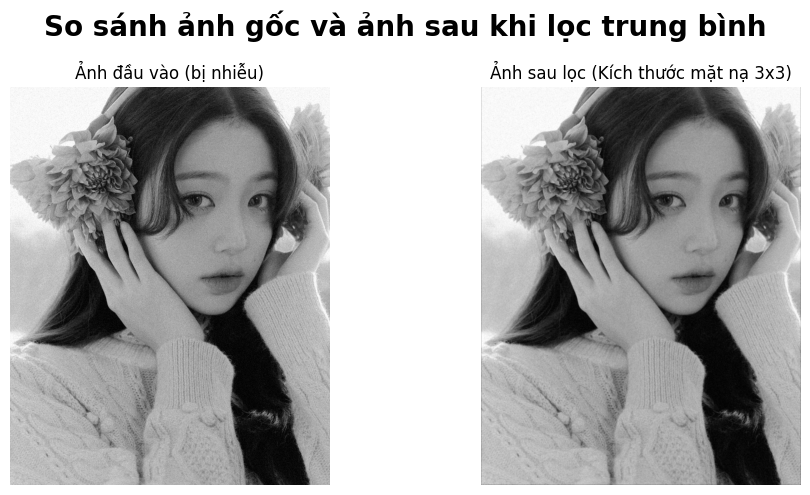

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Bước 1: Đọc ảnh và chuyển sang ảnh xám
  # Tải ảnh lên từ máy tính
uploaded = files.upload()  # Hiển thị giao diện tải lên
uploaded_filename = list(uploaded.keys())[0]  # Lấy tên tệp đầu tiên được tải lên
print(f"Tệp được tải lên: {uploaded_filename}")
  # Đọc ảnh và chuyển sang ảnh xám
anh_nhieu = Image.open(uploaded_filename).convert("L")
ma_tran_anh_nhieu = np.array(anh_nhieu)

# Bước 2: Xây dựng hàm lọc trung bình thủ công
def loc_trung_binh(anh, kich_thuoc_mat_na):
    """
    Thực hiện lọc trung bình trên ma trận ảnh.
    - Thêm padding để tránh lỗi biên.
    - Tính toán trung bình của các giá trị pixel trong một cửa sổ vuông.
    """
    dem = kich_thuoc_mat_na // 2  # Bán kính của kernel (kích thước cửa sổ / 2)
    chieu_cao, chieu_rong = anh.shape
    # Tạo padding xung quanh ảnh để tránh lỗi biên khi xử lý
    chieu_cao_padding = chieu_cao + 2 * dem
    chieu_rong_padding = chieu_rong + 2 * dem
    anh_padding = [[0] * chieu_rong_padding for _ in range(chieu_cao_padding)]
    # Sao chép nội dung ảnh gốc vào giữa ảnh padding
    # Các pixel được thêm vào biên sẽ có giá trị 0
    for i in range(chieu_cao):
        for j in range(chieu_rong):
            anh_padding[i + dem][j + dem] = anh[i][j]
   # Tạo ma trận kết quả để lưu các giá trị sau khi lọc
    anh_loc = [[0] * chieu_rong for _ in range(chieu_cao)]

    # Lọc trung bình: duyệt qua từng pixel trong ảnh gốc
    for i in range(chieu_cao):
        for j in range(chieu_rong):
            tong = 0
            so_phan_tu = 0
            # Lấy trung bình các giá trị trong cửa sổ kích thước `kich_thuoc_mat_na`
            for x in range(-dem, dem + 1):
                for y in range(-dem, dem + 1):
                    tong += anh_padding[i + dem + x][j + dem + y]
                    so_phan_tu += 1
            anh_loc[i][j] = tong // so_phan_tu  # Lấy giá trị trung bình (làm tròn xuống)
    return anh_loc

# Bước 3: Áp dụng hàm lọc trung bình với kích thước cửa sổ được chỉ định
  # Yêu cầu người dùng nhập kích thước mặt nạ
print("Chọn kích thước mặt nạ:")
print("3: Kích thước mặt nạ 3x3")
print("5: Kích thước mặt nạ 5x5")
print("7: Kích thước mặt nạ 7x7")
# Nhập kích thước mặt nạ
while True:
    try:
        kich_thuoc_mat_na = int(input())
        if kich_thuoc_mat_na in [3, 5, 7]:
            break
        else:
            print("Kích thước không hợp lệ! Vui lòng chỉ nhập 3, 5, hoặc 7.")
    except ValueError:
        print("Vui lòng nhập số hợp lệ.")
# Hiển thị kết quả lựa chọn
print(f"Kích thước mặt nạ bạn chọn là: {kich_thuoc_mat_na}x{kich_thuoc_mat_na}")
ma_tran_anh_loc = loc_trung_binh(ma_tran_anh_nhieu, kich_thuoc_mat_na)

# Bước 4: Hiển thị kết quả
plt.figure(figsize=(10, 5))

plt.suptitle("So sánh ảnh gốc và ảnh sau khi lọc trung bình",
             fontsize=20,
             fontweight='bold',
             fontname='DejaVu Sans')

# Hiển thị nhiễu đầu vào
plt.subplot(1, 2, 1)
plt.title("Ảnh đầu vào (bị nhiễu)")
plt.imshow(ma_tran_anh_nhieu, cmap="gray")  # Hiển thị ảnh ở thang độ xám
plt.axis("off")  # Tắt hiển thị trục
# Hiển thị ảnh sau khi lọc
plt.subplot(1, 2, 2)
plt.title(f"Ảnh sau lọc (Kích thước mặt nạ {kich_thuoc_mat_na}x{kich_thuoc_mat_na})")
plt.imshow(ma_tran_anh_loc, cmap="gray")  # Hiển thị ảnh đã lọc
plt.axis("off")  # Tắt hiển thị trục
# kết quả hiển thị
plt.tight_layout()  # Căn chỉnh bố cục
plt.show()

# Bước 5: Lưu ảnh kết quả
# Chuyển đổi danh sách `ma_tran_anh_loc` thành mảng NumPy
ma_tran_anh_loc_array = np.array(ma_tran_anh_loc)
# Lưu ảnh kết quả
output_filename =  f"Ảnh sau lọc với mặt nạ lọc_{kich_thuoc_mat_na}x{kich_thuoc_mat_na}.png"
Image.fromarray(ma_tran_anh_loc_array.astype(np.uint8)).save(output_filename)
files.download(output_filename)  # Tải ảnh kết quả về máy


# PSNR

Chọn tệp ảnh gốc (tham chiếu):


Saving anhgoc_case0.jpg to anhgoc_case0 (11).jpg


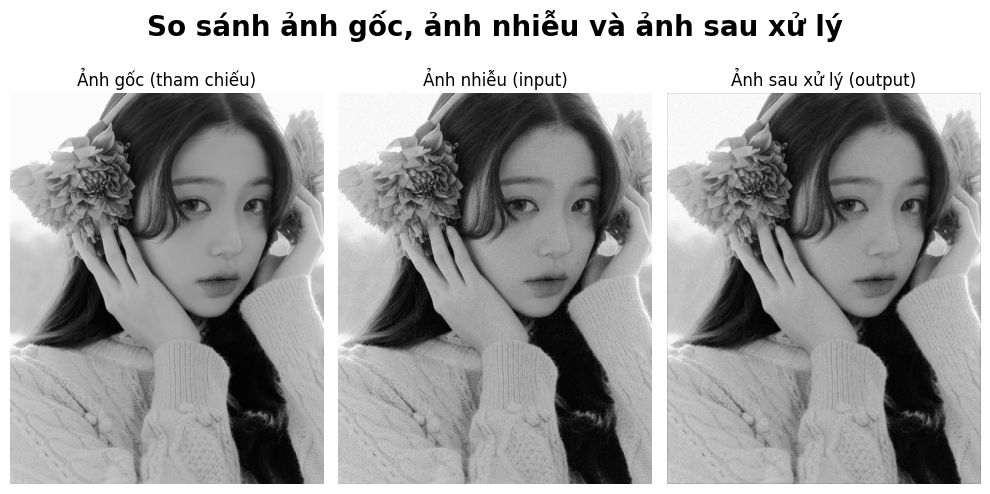


Chỉ số PSNR giữa ảnh gốc và ảnh sau xử lý: 31.873 dB


In [ ]:
from google.colab import files

# Hàm tính PSNR
def tinh_psnr(anh_goc, anh_sau_xu_ly):
    """
    Tính chỉ số PSNR (Peak Signal-to-Noise Ratio) giữa hai ảnh.
    """
    mse = np.mean((anh_goc - anh_sau_xu_ly) ** 2)
    if mse == 0:
        return float('inf')  # Nếu không có lỗi (MSE = 0), PSNR là vô cùng.

    diemanh_toida = 255.0  # Giá trị pixel tối đa
    psnr = 10 * np.log10((diemanh_toida ** 2) / mse)
    return psnr

# Bước 1: Đọc ảnh gốc từ máy tính
print("Chọn tệp ảnh gốc (tham chiếu):")
uploaded_goc = files.upload()  # Hiển thị giao diện chọn tệp
duong_dan_anh_goc = list(uploaded_goc.keys())[0]  # Lấy tên tệp ảnh gốc
anh_goc = Image.open(duong_dan_anh_goc).convert("L")  # Chuyển ảnh gốc sang grayscale
ma_tran_anh_goc = np.array(anh_goc)  # Chuyển ảnh gốc thành ma trận NumPy

# Tính PSNR giữa ảnh gốc và ảnh sau xử lý
psnr = tinh_psnr(ma_tran_anh_goc, ma_tran_anh_loc)  # ma_tran_anh_loc là kết quả sau lọc trung bình

# Hiển thị ảnh
plt.figure(figsize=(10, 5))

plt.suptitle("So sánh ảnh gốc, ảnh nhiễu và ảnh sau xử lý\n",
             fontsize=20,
             fontweight='bold')


# Ảnh gốc
plt.subplot(1, 3, 1)
plt.title("Ảnh gốc (tham chiếu)")
plt.imshow(ma_tran_anh_goc, cmap="gray")
plt.axis("off")

# Ảnh nhiễu
plt.subplot(1, 3, 2)
plt.title("Ảnh nhiễu (input)")
plt.imshow(ma_tran_anh_nhieu, cmap="gray")
plt.axis("off")

# Ảnh sau xử lý
plt.subplot(1, 3, 3)
plt.title(f"Ảnh sau xử lý (output)")
plt.imshow(ma_tran_anh_loc, cmap="gray")
plt.axis("off")

# Căn chỉnh và hiển thị hình ảnh
plt.tight_layout()
plt.show()

# Hiển thị kết quả PSNR
print(f"\nChỉ số PSNR giữa ảnh gốc và ảnh sau xử lý: {psnr:.3f} dB")


# SSIM

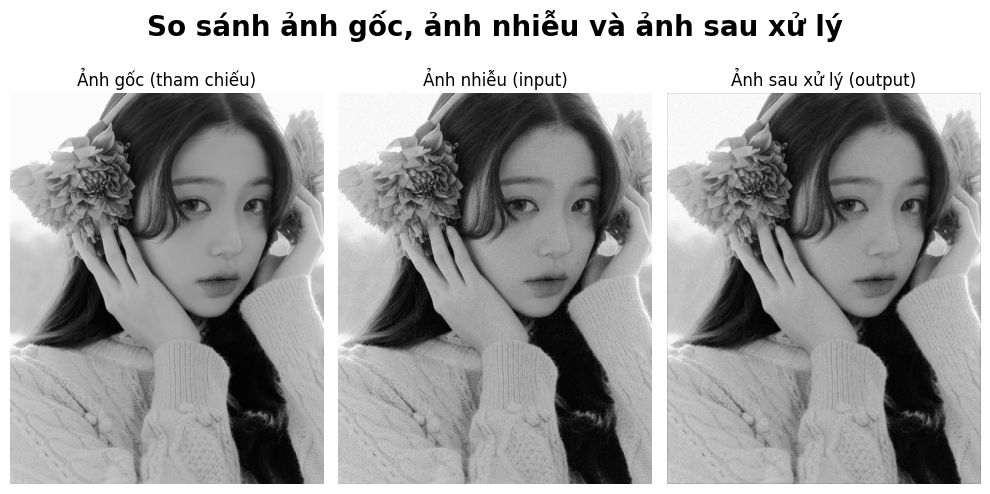


Chỉ số SSIM giữa ảnh gốc và ảnh qua hàm lọc trung bình: 0.995


In [ ]:
# Hàm tính SSIM
def tinh_ssim(ma_tran_anh_goc, ma_tran_anh_loc):
    """
    Tính chỉ số SSIM (Structural Similarity Index Measure) giữa hai ảnh.
    """
    # Các hằng số dùng trong công thức SSIM để ổn định tính toán
    C1 = 6.5025
    C2 = 58.5225

    # Đảm bảo ảnh ở dạng float64 để tính toán chính xác
    ma_tran_anh_goc = np.array(ma_tran_anh_goc, dtype=np.float64)
    ma_tran_anh_loc = np.array(ma_tran_anh_loc, dtype=np.float64)

    # Tính trung bình, phương sai và hiệp phương sai
    trung_binh_goc = ma_tran_anh_goc.mean()
    trung_binh_loc = ma_tran_anh_loc.mean()

    phuong_sai_goc = ma_tran_anh_goc.var()
    phuong_sai_loc = ma_tran_anh_loc.var()

    hiep_phuong_sai = ((ma_tran_anh_goc - trung_binh_goc) * (ma_tran_anh_loc - trung_binh_loc)).mean()

    # Áp dụng công thức SSIM
    tu_so = (2 * trung_binh_goc * trung_binh_loc + C1) * (2 * hiep_phuong_sai + C2)
    mau_so = (trung_binh_goc**2 + trung_binh_loc**2 + C1) * (phuong_sai_goc + phuong_sai_loc + C2)
    ssim = tu_so / mau_so

    return ssim

# Tính SSIM giữa ảnh gốc và ảnh sau xử lý
ssim = tinh_ssim(ma_tran_anh_goc, ma_tran_anh_loc)

# Hiển thị ảnh
plt.figure(figsize=(10, 5))

plt.suptitle("So sánh ảnh gốc, ảnh nhiễu và ảnh sau xử lý\n",
             fontsize=20,
             fontweight='bold')


# Ảnh gốc
plt.subplot(1, 3, 1)
plt.title("Ảnh gốc (tham chiếu)")
plt.imshow(ma_tran_anh_goc, cmap="gray")
plt.axis("off")

# Ảnh nhiễu
plt.subplot(1, 3, 2)
plt.title("Ảnh nhiễu (input)")
plt.imshow(ma_tran_anh_nhieu, cmap="gray")
plt.axis("off")

# Ảnh sau xử lý
plt.subplot(1, 3, 3)
plt.title(f"Ảnh sau xử lý (output)")
plt.imshow(ma_tran_anh_loc, cmap="gray")
plt.axis("off")

# Căn chỉnh và hiển thị hình ảnh
plt.tight_layout()
plt.show()

# Hiển thị kết quả SSIM
print(f"\nChỉ số SSIM giữa ảnh gốc và ảnh qua hàm lọc trung bình: {ssim:.3f}")